In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!git clone https://github.com/mcain368/Super_Store.git


Cloning into 'Super_Store'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 26 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (26/26), 1006.73 KiB | 13.98 MiB/s, done.


In [ ]:
%cd Super_Store

/content/Super_Store/Super_Store


In [ ]:
!ls

data


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df = pd.read_csv('data/Superstore_Fixed.csv', encoding='latin-1')

In [ ]:
print("Shape:", df.shape)
print("\nMissing values:")
print(df.isnull().sum())

print("\nFirst 5 rows:")
df.head()

Shape: (9994, 21)

Missing values:
row_id           0
order_id         0
order_date       0
ship_date        0
Ship_Mode        0
Customer_ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal_Code      0
Region           0
Product_ID       0
Category         0
Sub_Category     0
Product_Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

First 5 rows:


,row_id,order_id,order_date,ship_date,Ship_Mode,Customer_ID,Customer Name,Segment,Country,City,...,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


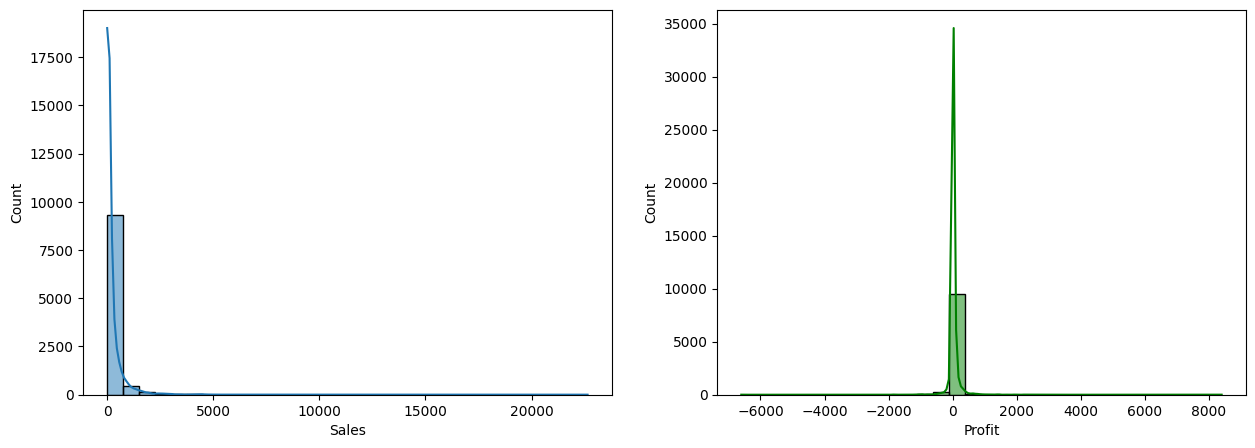

In [ ]:
# Sales and Profit distributions
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(df['Sales'], bins=30, kde=True, ax=ax[0])
sns.histplot(df['Profit'], bins=30, kde=True, color='green', ax=ax[1])
plt.show()

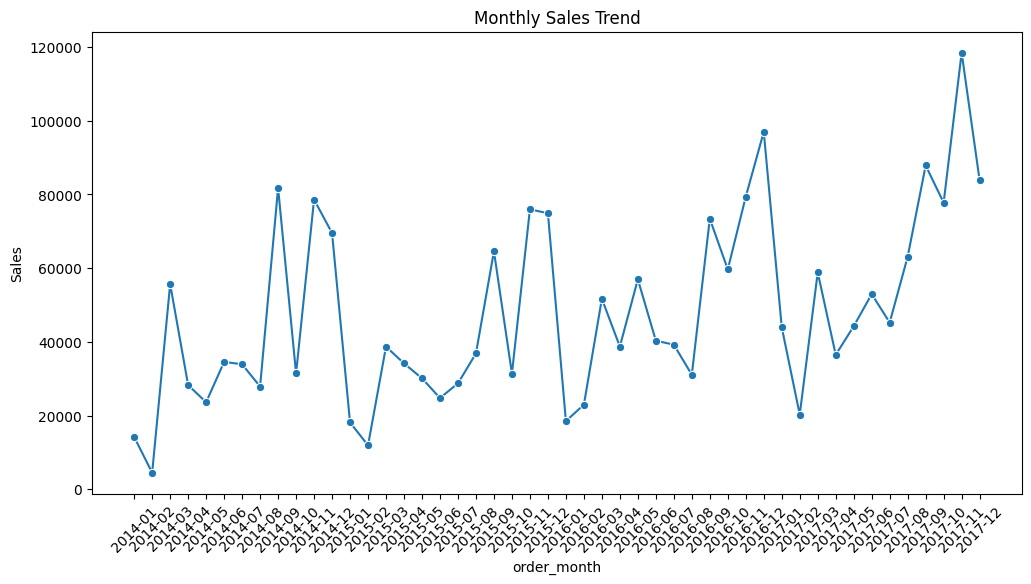

In [ ]:
#converting dates to get the months
df['order_date'] = pd.to_datetime(df['order_date'])
df['order_month'] = df['order_date'].dt.to_period('M').astype(str)

# Monthly sales trend
monthly_sales = df.groupby('order_month')['Sales'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='order_month', y='Sales', marker='o')
plt.xticks(rotation=45)
plt.title('Monthly Sales Trend')
plt.show()

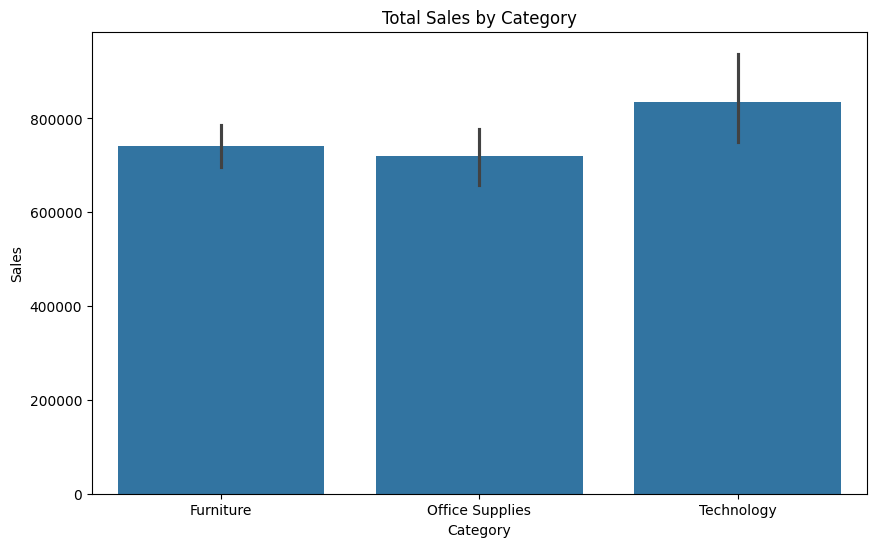

In [ ]:
# Sales by Category
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Category', y='Sales', estimator=sum)
plt.title('Total Sales by Category')
plt.show()

# Profit by Sub-Category interactive chart
fig = px.bar(df.groupby('Sub_Category')['Profit'].sum().reset_index(),
             x='Sub_Category', y='Profit', title='Profit by Sub-Category')
fig.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

X = df[['Category', 'Sub_Category', 'Sales', 'Quantity', 'Discount', 'Region']]
y = df['Profit']

# Preprocess categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['Category', 'Sub_Category', 'Region'])
    ],
    remainder='passthrough'
)

X_processed = preprocessor.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

RMSE: 228.70
R²: -0.08


In [ ]:
from joblib import dump

# Save model to Google Drive
dump(model, '/content/drive/MyDrive/Super_Store/models/profit_predictor.joblib')

# Verify
!ls '/content/drive/MyDrive/Super_Store/models'

In [ ]:

%cd /content/Super_Store
!mkdir -p models

/content/Super_Store


In [ ]:
!ls

models	README.md  Super_Store


In [ ]:
from joblib import dump

dump(model, 'models/profit_predictor.joblib')

['models/profit_predictor.joblib']

In [ ]:
# Create directories
!mkdir -p reports/figures

# Save plots
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Category', y='Sales', estimator=sum)
plt.title('Total Sales by Category')
plt.savefig('reports/figures/sales_by_category.png', bbox_inches='tight')
plt.close()

In [ ]:
!git clone https://github.com/mcain368/Super_Store.git
!git add .
!git commit -m "Full analysis: EDA, model, and visualizations"
!git push origin main

Cloning into 'Super_Store'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 26 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (26/26), 1006.73 KiB | 5.03 MiB/s, done.
hint: You've added another git repository inside your current repository.
hint: Clones of the outer repository will not contain the contents of
hint: the embedded repository and will not know how to obtain it.
hint: If you meant to add a submodule, use:
hint: 
hint: 	git submodule add <url> Super_Store
hint: 
hint: If you added this path by mistake, you can remove it from the
hint: index with:
hint: 
hint: 	git rm --cached Super_Store
hint: 
hint: See "git help submodule" for more information.
Author identity unknown

*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Om

In [ ]:
!git clone https://github.com/mcain368/Super_Store.git

Cloning into 'Super_Store'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 26 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (26/26), 1006.73 KiB | 5.47 MiB/s, done.


In [ ]:
# Navigate to your repo
%cd Super_Store

# List files to confirm
!ls

/content/Super_Store
data
